# Projeto 3 - Clusterização de dados de vendas de produtos
## Wholesale customers Data Set - UCI

## Introdução

O conjunto de dados de vendas esta localizado na plataforma UCI no seguinte link - https://archive.ics.uci.edu/ml/datasets/Wholesale+customers. Este é um conjunto de dados que não possui rotulo, o nosso desafio será agrupar essas vendas em grupos e avaliar estes grupos.

Segue a descrição das variaveis:
- FRESH: gastos anuais em produtos frescos
- MILK: gastos anuais em produtos lácteos
- GROCERY: gastos anuais em produtos de mercearia
- FROZEN: gastos anuais em produtos congelados
- DETERGENTS_PAPER: gastos anuais em detergentes e produtos de papel
- DELICATESSEN: gastos anuais em produtos artesanais (queijos, vinhos, doces)
- CHANNEL: origem do cliente - Horeca (Hotel/Restaurante/Café) (1) ou canais de varejo (2)
- REGION: região do cliente Lisbon (1), Oporto (2) or Other Region (3)

#### referencia: 
Abreu, N. (2011). Analise do perfil do cliente Recheio e desenvolvimento de um sistema promocional. Mestrado em Marketing, ISCTE-IUL, Lisbon

# Sobre este projeto

Neste projeto treine os conhecimentos aprendidos até o momento e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo clusterização e justificar

# Preparação do ambiente

- Acessem o link - https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv e faça o download do conjunto de dados.

# Exercicio 1. (3.0 pontos)

Faça um gráfico de cotovelo, quantos clusters aproximadamente melhor separam este conjunto de dados informado pelo grafico de cotovelo?

In [1]:
#### VALE 0.5 pontos
#### CONSTRUA OS SEUS GRAFICOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

# Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Implementando os dados no dataframe

df = pd.read_csv('/content/Wholesale customers data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


Considerando a coluna Region como categórica, aplica-se o conceito de variáveis dummies a fim de que seus valores não tenham pesos distintos e interfiram na clusterização. 

In [3]:
# Separando a variável Region em três colunas binárias

df_region = pd.get_dummies(df['Region'])
df_region = df_region.rename(columns={1:'Region 1', 2:'Region 2', 3:'Region 3'})
df_region

,Region 1,Region 2,Region 3
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
435,0,0,1
436,0,0,1
437,0,0,1
438,0,0,1


In [4]:
# Retornando os dados de Region ao dataframe original
df['Region 1'] = df_region['Region 1']
df['Region 2'] = df_region['Region 2']
df['Region 3'] = df_region['Region 3']
# Retirando a coluna original Region do dataframe
df = df.drop(['Region'], axis=1)
df

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region 1,Region 2,Region 3
0,2,12669,9656,7561,214,2674,1338,0,0,1
1,2,7057,9810,9568,1762,3293,1776,0,0,1
2,2,6353,8808,7684,2405,3516,7844,0,0,1
3,1,13265,1196,4221,6404,507,1788,0,0,1
4,2,22615,5410,7198,3915,1777,5185,0,0,1
...,...,...,...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204,0,0,1
436,1,39228,1431,764,4510,93,2346,0,0,1
437,2,14531,15488,30243,437,14841,1867,0,0,1
438,1,10290,1981,2232,1038,168,2125,0,0,1


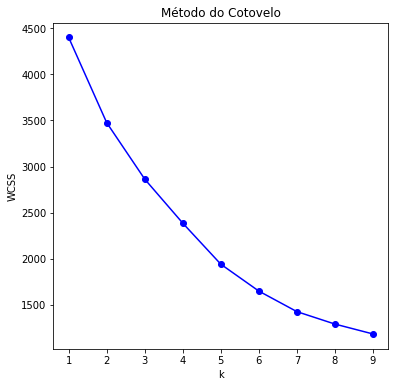

In [5]:
# Definindo os parâmetros de X e normalizando os dados
X = df
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# Gráfico do Cotovelo
# Within-Cluster Sum of Square
WCSS = []

K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_std)
    WCSS.append(kmeans.inertia_)

plt.figure(figsize=(6,6))
plt.plot(K, WCSS, '-bo')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title("Método do Cotovelo")
plt.show()

**RESPOSTA** (VALE 1.0 ponto):\
Mediante a análise do Gráfico de Cotovelo, temos o indício de que o número k, representando o número de clusters que melhor separam os dados, está entre 3 e 6

Construa um modelo de **clusterização K-Médias** usando o melhor numero de clusters informado pelo gráfico de cotovelo e usem o parametro **random_state** com valor 10.

In [6]:
#### VALE 0.5 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

# Parâmetros:
# n_clusters: quantidade de grupos a serem formados

kmedia3 = KMeans(n_clusters=3, random_state=10)
kmedia3_pred = kmedia3.fit_predict(X_std)
kmedia4 = KMeans(n_clusters=4, random_state=10)
kmedia4_pred = kmedia4.fit_predict(X_std)
kmedia5 = KMeans(n_clusters=5, random_state=10)
kmedia5_pred = kmedia5.fit_predict(X_std)
kmedia6 = KMeans(n_clusters=6, random_state=10)
kmedia6_pred = kmedia6.fit_predict(X_std)

In [7]:
# Importando biblioteca do Silhouette Score

from sklearn.metrics import silhouette_score

In [8]:
# Implementando o teste do Silhouette Score para as quantidades de grupos selecionados

print("\nK-means com k = 3")
print('Silhouette Score:', silhouette_score(X_std, kmedia3_pred, metric='euclidean'))

print("\nK-means com k = 4")
print('Silhouette Score:', silhouette_score(X_std, kmedia4_pred, metric='euclidean'))

print("\nK-means com k = 5")
print('Silhouette Score:', silhouette_score(X_std, kmedia5_pred, metric='euclidean'))

print("\nK-means com k = 6")
print('Silhouette Score:', silhouette_score(X_std, kmedia6_pred, metric='euclidean'))


K-means com k = 3
Silhouette Score: 0.3542843413611215

K-means com k = 4
Silhouette Score: 0.42202746861473966

K-means com k = 5
Silhouette Score: 0.4235024397671561

K-means com k = 6
Silhouette Score: 0.43520834442915474


Mediante os resultados obtidos pelo método do Silhouette Score, considerando que quanto maior for o valor do k escolhido, maior a complexidade do modelo, irei optar pelo k = 4, pois apesar das diferenças entre os resultados dos testes, as quais considero pequenas, acredito não valer a pena tornar o modelo mais complexo.

In [9]:
# Importando ao dataframe a coluna da clusterização considerando k = 4

df['Cluster'] = kmedia4_pred
df

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region 1,Region 2,Region 3,Cluster
0,2,12669,9656,7561,214,2674,1338,0,0,1,2
1,2,7057,9810,9568,1762,3293,1776,0,0,1,2
2,2,6353,8808,7684,2405,3516,7844,0,0,1,2
3,1,13265,1196,4221,6404,507,1788,0,0,1,0
4,2,22615,5410,7198,3915,1777,5185,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204,0,0,1,0
436,1,39228,1431,764,4510,93,2346,0,0,1,0
437,2,14531,15488,30243,437,14841,1867,0,0,1,2
438,1,10290,1981,2232,1038,168,2125,0,0,1,0


Adicione o resultado da clusterização no conjunto de dados original, chame essa nova variavel de **cluster** e conte quantas observações há em cada cluster e preencha:

In [10]:
#### VALE 0.5 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

# Contabilizando a quantidade de observações em cada cluster

cluster1 = df['Cluster'].value_counts()
cluster1

0    212
2    109
3     73
1     46
Name: Cluster, dtype: int64

In [11]:
#### VALE 0.5 pontos
# Substitua __ pelos valores solicitados
print('Total de observações do cluster 1: {}'.format(len(df[df['Cluster']==0])))
print('Total de observações do cluster 2: {}'.format(len(df[df['Cluster']==1])))
print('Total de observações do cluster 3: {}'.format(len(df[df['Cluster']==2])))
print('Total de observações do cluster 4: {}'.format(len(df[df['Cluster']==3])))
# copie a linha de cima, alterando o cluster e preenchendo o total

Total de observações do cluster 1: 212
Total de observações do cluster 2: 46
Total de observações do cluster 3: 109
Total de observações do cluster 4: 73


# Exercicio 2. (4.0 pontos)

Escolha dois clusters e separe os dados em dois subconjuntos, chamando-os de clusterA e clusterB.

In [12]:
#### VALE 1.0 ponto
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

# Separando os dois subconjuntos considerando os clusters 0 e 3

clusterA = df[df['Cluster'] == 0]
clusterB = df[df['Cluster'] == 3]

Utilizaremos a função **.describe()** para obtermos as medidas de média, desvio padrão, valor minimo e valor máximo dos subconjuntos clusterA e clusterB

In [13]:
#### VALE 1.0 ponto
#### EXECUTE O COMANDO ABAIXO PARA clusterA
clusterA.describe()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region 1,Region 2,Region 3,Cluster
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.0,212.0,212.0,212.0
mean,1.023585,13591.070755,3099.311321,3651.250000,3404.839623,766.858491,1177.353774,0.0,0.0,1.0,0.0
std,0.152111,13219.120046,2739.188875,2948.239487,4319.810733,1041.929789,1395.582795,0.0,0.0,0.0,0.0
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,0.0,0.0,1.0,0.0
25%,1.000000,3793.250000,1179.500000,1667.000000,777.750000,177.750000,378.750000,0.0,0.0,1.0,0.0
50%,1.000000,9635.000000,2251.500000,2645.000000,1740.500000,390.500000,783.000000,0.0,0.0,1.0,0.0
75%,1.000000,18830.250000,3986.500000,4795.250000,4477.500000,948.250000,1521.250000,0.0,0.0,1.0,0.0
max,2.000000,76237.000000,18664.000000,16483.000000,35009.000000,6907.000000,14351.000000,0.0,0.0,1.0,0.0


In [14]:
# Contabilizando os canais de origem das observações no ClusterA

clusterA['Channel'].value_counts()

1    207
2      5
Name: Channel, dtype: int64

In [15]:
#### VALE 1.0 ponto
#### EXECUTE O COMANDO ABAIXO PARA clusterB
clusterB.describe()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region 1,Region 2,Region 3,Cluster
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.0,73.0,73.0,73.0
mean,1.191781,11363.890411,4657.493151,5966.616438,2956.383562,1898.479452,1287.410959,1.0,0.0,0.0,3.0
std,0.396426,11787.286239,4389.567244,5847.660113,3120.760176,2692.337476,1292.021240,0.0,0.0,0.0,0.0
min,1.000000,18.000000,258.000000,489.000000,61.000000,5.000000,7.000000,1.0,0.0,0.0,3.0
25%,1.000000,2806.000000,1222.000000,1883.000000,950.000000,263.000000,490.000000,1.0,0.0,0.0,3.0
50%,1.000000,7858.000000,3575.000000,3828.000000,1777.000000,694.000000,797.000000,1.0,0.0,0.0,3.0
75%,1.000000,15603.000000,6602.000000,7041.000000,4260.000000,2894.000000,1693.000000,1.0,0.0,0.0,3.0
max,2.000000,56083.000000,23527.000000,23596.000000,18711.000000,12420.000000,6854.000000,1.0,0.0,0.0,3.0


In [16]:
# Contabilizando os canais de origem das observações no ClusterB

clusterB['Channel'].value_counts()

1    59
2    14
Name: Channel, dtype: int64

Comparando as médias, valores minimos e máximos obtidos, há diferença entre o subconjunto clusterA e clusterB?

**RESPOSTA** (VALE 0.5 pontos):\
Sim, existem diferenças, porém não em todas as medidas.\
Analisando as médias de consumo, os valores apresentados entre os subconjuntos  estão dentro da mesma ordem de grandeza.\
Quando a análise passa a ser feita  entre os valores de mínimo, pode-se afirmar que o consumo mínimo do grupo ClusterB tem valores maiores que o do grupo ClusterA.\
Já para os valores de máximo, existem valores maiores para o grupo ClusterA e valores maiores para o grupo ClusterB, o que faz sentido pois em termos de média os subconjuntos estão equilibrados.

Sendo dois agrupamentos distintos, qual rotulo poderiamos utilizar para identifica-los? Justifique a sua resposta

**RESPOSTA** (VALE 0.5 pontos):\
O subconjunto ClusterA tem todos os dados pertencentes a Região 3 a qual engloba as demais regiões que não Lisboa e Porto. Podemos observar que os valores de mínimo são baixos, o que nos indica que o perfil do comprador engloba pessoas que realizarm compras de menor volume (conforme a necessidade) ou também que os valores dos produtos não podem ser inflacionados pelos estabelecimentos por não estarem localizados em grandes centros. Já os valores de máximo são mais altos para as categorias de 'Fresh', 'Frozen' e 'Milk', indicando um perfil de consumidor que procura mais por estes tipos de produtos.\
Outra observação a ser feita é que a grande maioria dos clientes provem do Channel 1, ou seja, são clientes que estão abastecendos seus Hoteis, Restaurantes ou Cafés.\
Uma vez que a Região e o Channel estão bem definidos, podemos criar modelos de predição o qual traça o perfil de consumo destes clientes de forma que possa ser ofertado ainda mais produtos voltados para este tipo de cliente. Neste caso podemos rotular pelo 'Channel' e verificar a correlação das categorias, entendendo assim em quais produtos devem colocar seus esforços de venda.

O subconjunto ClusterB tem todos os dados pertencentes a Região 1 a qual engloba apenas a cidade de Lisboa. Nesta região os valores de mínimos são mais altos, indicando um perfil de consumidor que consome produtos mais caros ou também que os estabelecimentos precisam ou podem trabalhar com uma margem de lucro maior por estarem localizados dentro de um grande centro. Já os valores de máximo são mais altos para as categorias de 'Fresh', 'Milk' e 'Grocery', indicando um perfil de consumidor que procura mais por estes tipos de produtos.\
Com relação a origem dos clientes, esté subconjunto tem uma divisão melhor entre as origens porém com mais observações de cliente da Região 1.\ 
Neste caso podemos criar modelos de predição com a finalidade de prever o perfil dos consumidores das categorias de menor volume de venda, a fim de realizar ações de marketing com o objetivo de atrair mais consumidores deste perfil aumentando assim estes volumes de venda, desta forma o rótulo pode variar entre 'Frozen', 'Detergents_Paper' e 'Delicatessen'.

# Exercicio 3. (3 pontos)

Responda, quais são as vantagens e desvantagens do algoritmo K-Médias?

**RESPOSTA** (VALE 1.0 ponto):\
Vantagens:\
Método de fácil implementação;\
É escalonável para um grande conjunto de dados;\
É mais rápido para grandes conjuntos de dados, o que diminui custos computacionais;\
Todos os objetos são atribuídos a um grupo.\


Desvantagens:\
É sensível a outliers;\
Mais trabalhoso, pois precisa escolher os valores k manualmente;\
Quanto mais dimensões, menor sua escalabilidade;\
Todos os objetos são forçados a pertencerem a um grupo.

Quantos elementos há em cada clusters se o numero de clusters for igual ao total de observações?\
Se o parametro **k** for igual a 1, quantos clusters teremos e quantos elementos há em cada cluster?

**RESPOSTA** (VALE 1.0 ponto):\
Tendo o número de clusters igual ao total de observações, teremos dentro de cada cluster apenas um elemento.\
Sendo o parâmetro k igual a 1, teremos então apenas um cluster o qual englobará todos os elementos do conjunto de dados.

A inicialização dos centroides afeta o algoritmo K-Médias?

RESPOSTA (VALE 1.0 ponto):\
Sim, afeta. Ao realizar a inicialização do centróide levando em conta ele ser um ponto distante, corre-se o risco dele terminar sem pontos associados a ele, ou, mais de um cluster pode acabar associado ao mesmo centróide. Outro ponto a ser avaliado na inicialização é se em um mesmo cluster incidir mais de um centróide. 